# Process Walmart data (week 6)

### by Group 12:
Najma Ahmed (21078548), Oceanne Romas (21042616), Yana Tsapalova (22032061), Grace Meijer (21072213) 

24.09.2023

### 1. Import the data set into a Jupyter Notebook as dataframes

In [ ]:
#importing all the necessary packages
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#reading the csv files and saving them as dataframes
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
holidaydates = pd.read_csv('Holiday Dates.csv', sep=";", encoding='ISO-8859-1', engine ='python')
departments = pd.read_csv('Departments.csv', sep=";", encoding='ISO-8859-1', engine ='python') 


holidaydates

Date  HolidayNames
0    12-2-2010     Superbowl
1    11-2-2011     Superbowl
2    10-2-2011     Superbowl
3     8-2-2103     Superbowl
4    10-9-2010     Labor Day
5     9-9-2011     Labor Day
6     7-9-2012     Labor Day
7     6-9-2013     Labor Day
8   26-11-2010  Thanksgiving
9   25-11-2011  Thanksgiving
10  23-11-2012  Thanksgiving
11  29-11-2013  Thanksgiving
12  31-12-2010     Christmas
13  30-12-2011     Christmas
14  28-11-2012     Christmas
15  27-12-2013     Christmas

In [ ]:
#for all the columns that contain dates, we switched the values type to datetime for future plotting with Matplotlib
#we specified the format of the dates to ensure consistent parsing
holidaydates['Date'] = pd.to_datetime(holidaydates['Date'],dayfirst = True)
features['Date'] = pd.to_datetime(features['Date'], dayfirst = True)
train['Date'] = pd.to_datetime(train['Date'], dayfirst = True)
test['Date'] = pd.to_datetime(test['Date'], dayfirst = True)

holidaydates

Date  HolidayNames
0  2010-02-12     Superbowl
1  2011-02-11     Superbowl
2  2011-02-10     Superbowl
3  2103-02-08     Superbowl
4  2010-09-10     Labor Day
5  2011-09-09     Labor Day
6  2012-09-07     Labor Day
7  2013-09-06     Labor Day
8  2010-11-26  Thanksgiving
9  2011-11-25  Thanksgiving
10 2012-11-23  Thanksgiving
11 2013-11-29  Thanksgiving
12 2010-12-31     Christmas
13 2011-12-30     Christmas
14 2012-11-28     Christmas
15 2013-12-27     Christmas

### 2. Merge the dataframes in such a way you can use it for exploratory data analysis

In [ ]:
df_final = train.merge(features, on=['Date', 'Store', 'IsHoliday'], how="left")
df_final = df_final.merge(departments, on= 'Dept', how="left")
df_final = df_final.merge(holidaydates, on='Date', how="left")
df_final = df_final.merge(stores, on='Store', how="left" )
df_final = df_final.merge(test, on=['Store','Dept', 'Date', 'IsHoliday'], how="left")

### 3. Examine the data at a high level

In [ ]:
df_final.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  150681.000000  111248.000000  137091.000000   
mean        3.361027    7246.420196    3334.628621    1439.421384   
std         0.458515    8291.221345    9475.357325    9623.078290   
min         2.472000       0.270000    -265.760000     -29.100000   
25%         2.933000    2240.270000      41.600000       5.080000   
50%         3.452000    5347.450000     192.000000      24.600000   
75%         3.738000    9210.900000    1926.940000     103.990000   
max         4.468000   88646.760000  104519.540000  141630.610000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  134967.000000  151432.000000  421570.000000  421570.000000   
mean     3383.168256    4628.975079     171.201947       7.960289   
std      6292.384031    5962.887455      39.159276       1.863296   
min         0.220000     135.160000     126.064000       3.879000   
25%       504.220000    1878.440000     132.022667       6.891000   
50%      1481.310000    3359.450000     182.318780       7.866000   
75%      3595.040000    5563.800000     212.416993       8.572000   
max     67474.850000  108519.280000     227.232807      14.313000   

                Size  
count  421570.000000  
mean   136727.915739  
std     60980.583328  
min     34875.000000  
25%     93638.000000  
50%    140167.000000  
75%    202505.000000  
max    219622.000000

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          421570 non-null  int64         
 1   Dept           421570 non-null  int64         
 2   Date           421570 non-null  datetime64[ns]
 3   Weekly_Sales   421570 non-null  float64       
 4   IsHoliday      421570 non-null  bool          
 5   Temperature    421570 non-null  float64       
 6   Fuel_Price     421570 non-null  float64       
 7   MarkDown1      150681 non-null  float64       
 8   MarkDown2      111248 non-null  float64       
 9   MarkDown3      137091 non-null  float64       
 10  MarkDown4      134967 non-null  float64       
 11  MarkDown5      151432 non-null  float64       
 12  CPI            421570 non-null  float64       
 13  Unemployment   421570 non-null  float64       
 14  Description,,  421570 non-null  object        
 15  

In [ ]:
df_final.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment        Description,, HolidayNames Type    Size  
0         8.106  Candy and Tobacco,,          NaN    A  151315  
1         8.106  Candy and Tobacco,,    Superbowl    A  151315  
2         8.106  Candy and Tobacco,,          NaN    A  151315  
3         8.106  Candy and Tobacco,,          NaN    A  151315  
4         8.106  Candy and Tobacco,,          NaN    A  151315

In [ ]:
df_final.tail()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-10-05        628.10      False        64.89   
421567     45    98 2012-10-12       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
421565       3.997    4556.61      20.64       1.50    1601.01    3288.25   
421566       3.985    5046.74        NaN      18.82    2253.43    2340.01   
421567       4.000    1956.28        NaN       7.89     599.32    3990.54   
421568       3.969    2004.02        NaN       3.18     437.73    1537.49   
421569       3.882    4018.91      58.08     100.00     211.94     858.33   

               CPI  Unemployment Description,, HolidayNames Type    Size  
421565  192.013558         8.684      Bakery,,          NaN    B  118221  
421566  192.170412         8.667      Bakery,,          NaN    B  118221  
421567  192.327265         8.667      Bakery,,          NaN    B  118221  
421568  192.330854         8.667      Bakery,,          NaN    B  118221  
421569  192.308899         8.667      Bakery,,          NaN    B  118221

In [ ]:
# splitting the date column for the convenience 
df_final['Year'] = df_final['Date'].dt.year
df_final['Month'] = df_final['Date'].dt.month
df_final['Day'] = df_final['Date'].dt.day
df_final

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     1 2010-02-12      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-03-05      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-10-05        628.10      False        64.89   
421567     45    98 2012-10-12       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  MarkDown5  \
0            2.572        NaN        NaN        NaN  ...        NaN   
1            2.548        NaN        NaN        NaN  ...        NaN   
2            2.514        NaN        NaN        NaN  ...        NaN   
3            2.561        NaN        NaN        NaN  ...        NaN   
4            2.625        NaN        NaN        NaN  ...        NaN   
...            ...        ...        ...        ...  ...        ...   
421565       3.997    4556.61      20.64       1.50  ...    3288.25   
421566       3.985    5046.74        NaN      18.82  ...    2340.01   
421567       4.000    1956.28        NaN       7.89  ...    3990.54   
421568       3.969    2004.02        NaN       3.18  ...    1537.49   
421569       3.882    4018.91      58.08     100.00  ...     858.33   

               CPI  Unemployment        Description,, HolidayNames Type  \
0       211.096358         8.106  Candy and Tobacco,,          NaN    A   
1       211.242170         8.106  Candy and Tobacco,,    Superbowl    A   
2       211.289143         8.106  Candy and Tobacco,,          NaN    A   
3       211.319643         8.106  Candy and Tobacco,,          NaN    A   
4       211.350143         8.106  Candy and Tobacco,,          NaN    A   
...            ...           ...                  ...          ...  ...   
421565  192.013558         8.684             Bakery,,          NaN    B   
421566  192.170412         8.667             Bakery,,          NaN    B   
421567  192.327265         8.667             Bakery,,          NaN    B   
421568  192.330854         8.667             Bakery,,          NaN    B   
421569  192.308899         8.667             Bakery,,          NaN    B   

          Size  Year  Month  Day  
0       151315  2010      2    5  
1       151315  2010      2   12  
2       151315  2010      2   19  
3       151315  2010      2   26  
4       151315  2010      3    5  
...        ...   ...    ...  ...  
421565  118221  2012      9   28  
421566  118221  2012     10    5  
421567  118221  2012     10   12  
421568  118221  2012     10   19  
421569  118221  2012     10   26  

[421570 rows x 21 columns]

In [ ]:
#creating new columns for each holiday
df_final.loc[(df_final['Date'] == '2010-02-12')|(df_final['Date'] == '2011-02-11')|
                                             (df_final['Date'] == '2012-02-10'),'Super_Bowl'] = True
df_final.loc[(df_final['Date'] != '2010-02-12')&(df_final['Date'] != '2011-02-11')&
                                             (df_final['Date'] != '2012-02-10'),'Super_Bowl'] = False


df_final.loc[(df_final['Date'] == '2010-09-10')|(df_final['Date'] == '2011-09-09')|
                                             (df_final['Date'] == '2012-09-07'),'Labor_Day'] = True
df_final.loc[(df_final['Date'] != '2010-09-10')&(df_final['Date'] != '2011-09-09')&
                                             (df_final['Date'] != '2012-09-07'),'Labor_Day'] = False

df_final.loc[(df_final['Date'] == '2010-11-26')|(df_final['Date'] == '2011-11-25'),'Thanksgiving'] = True
df_final.loc[(df_final['Date'] != '2010-11-26')&(df_final['Date'] != '2011-11-25'),'Thanksgiving'] = False

df_final.loc[(df_final['Date'] == '2010-12-31')|(df_final['Date'] == '2011-12-30'),'Christmas'] = True
df_final.loc[(df_final['Date'] != '2010-12-31')&(df_final['Date'] != '2011-12-30'),'Christmas'] = False
df_final


Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     1 2010-02-12      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-03-05      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-10-05        628.10      False        64.89   
421567     45    98 2012-10-12       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  HolidayNames  Type  \
0            2.572        NaN        NaN        NaN  ...           NaN     A   
1            2.548        NaN        NaN        NaN  ...     Superbowl     A   
2            2.514        NaN        NaN        NaN  ...           NaN     A   
3            2.561        NaN        NaN        NaN  ...           NaN     A   
4            2.625        NaN        NaN        NaN  ...           NaN     A   
...            ...        ...        ...        ...  ...           ...   ...   
421565       3.997    4556.61      20.64       1.50  ...           NaN     B   
421566       3.985    5046.74        NaN      18.82  ...           NaN     B   
421567       4.000    1956.28        NaN       7.89  ...           NaN     B   
421568       3.969    2004.02        NaN       3.18  ...           NaN     B   
421569       3.882    4018.91      58.08     100.00  ...           NaN     B   

          Size  Year Month Day Super_Bowl  Labor_Day  Thanksgiving  Christmas  
0       151315  2010     2   5      False      False         False      False  
1       151315  2010     2  12       True      False         False      False  
2       151315  2010     2  19      False      False         False      False  
3       151315  2010     2  26      False      False         False      False  
4       151315  2010     3   5      False      False         False      False  
...        ...   ...   ...  ..        ...        ...           ...        ...  
421565  118221  2012     9  28      False      False         False      False  
421566  118221  2012    10   5      False      False         False      False  
421567  118221  2012    10  12      False      False         False      False  
421568  118221  2012    10  19      False      False         False      False  
421569  118221  2012    10  26      False      False         False      False  

[421570 rows x 25 columns]

### 4. Understand every column
### 5. Identify errors, missing values & corrupt records (make sure to check this even though it's quite a clean data set)
We are plotting histograms to see if the values are normally distributed.

count    421570.000000
mean         60.090059
std          18.447931
min          -2.060000
25%          46.680000
50%          62.090000
75%          74.280000
max         100.140000
Name: Temperature, dtype: float64

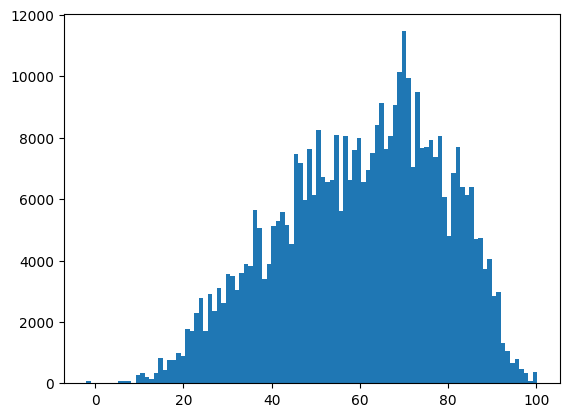

In [ ]:
plt.hist(df_final['Temperature'], bins=100)

df_describe= df_final['Temperature'].describe()
df_final[df_final['Temperature']== -2.060000]
df_describe
#the distribution is normal, no corrupt records

mean      3.361027
median    3.452000
Name: Fuel_Price, dtype: float64

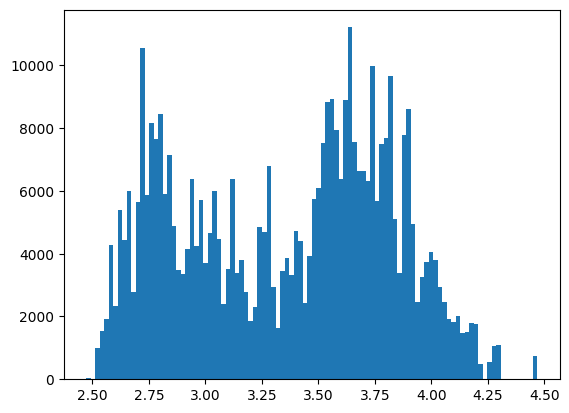

In [ ]:
plt.hist(df_final['Fuel_Price'], bins=100)
df_final['Fuel_Price'].describe()
df_final['Fuel_Price'].agg(['mean', 'median'])
#the distribution is normal, no corrupt records

(array([528.,  77., 242., 264., 462., 293., 425.,  72.,  80., 159., 289.,
        270., 272.,  69.,  39.,  96.,  81.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  78.,
         28.,  10.,  16.,  36.,  12.,  16., 118.,  68., 114., 110.,  48.,
         36.,  40.,  52., 100.,  20.,  40.,  60.,  12.,  19.,  55.,  83.,
         10.,  23.,  32.,  60., 150., 240., 127., 119., 188., 323., 121.,
        103.,  95., 129., 130., 163., 125., 168., 134., 127.,  32.,  71.,
         46.]),
 array([126.064     , 127.09312456, 128.12224913, 129.15137369,
        130.18049825, 131.20962281, 132.23874738, 133.26787194,
        134.2969965 , 135.32612107, 136.35524563, 137.38437019,
        138.41349476, 139.44261932, 140.47174388, 141.50086844,
        142.52999301, 143.55911757, 144.58824213, 145.6173667 

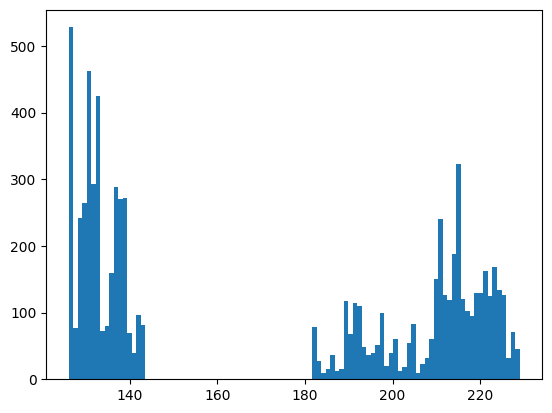

In [ ]:
plt.hist(features['CPI'], bins=100)
#features['CPI'].info()
#There are values missing from 144 to 181 -> the gap in the distribution is due to the jump in data values. 

count    421570.000000
mean          7.960289
std           1.863296
min           3.879000
25%           6.891000
50%           7.866000
75%           8.572000
max          14.313000
Name: Unemployment, dtype: float64

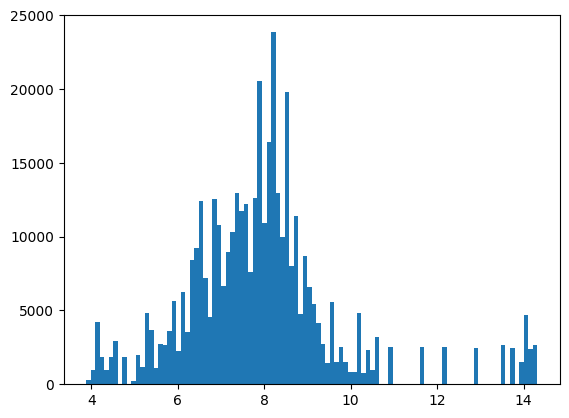

In [ ]:
plt.hist(df_final['Unemployment'], bins=100)
df_final['Unemployment'].describe()
#the distribution is normal, no corrupt records

count    421570.000000
mean     136727.915739
std       60980.583328
min       34875.000000
25%       93638.000000
50%      140167.000000
75%      202505.000000
max      219622.000000
Name: Size, dtype: float64

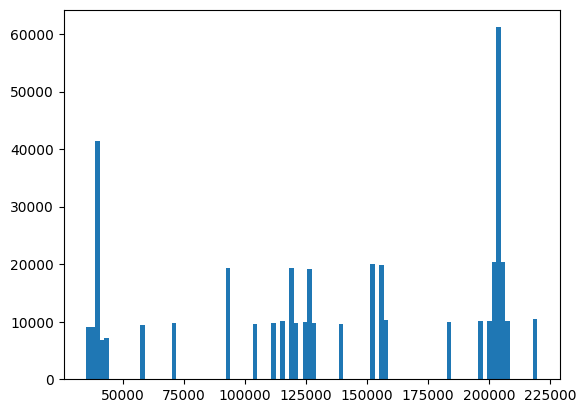

In [ ]:
plt.hist(df_final['Size'], bins=100)
df_final['Size'].agg(['median', 'mean'])
df_final['Size'].describe()
#the distribution is normal, no corrupt records

### 6. Understand every column: MarkDowns

In [ ]:
# we created a new dataframe for the mean values of each of the markdowns and weekly sales
df_final_mean = pd.DataFrame(df_final[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4',
                                       'MarkDown5', 'Weekly_Sales']].describe().mean())
df_final_mean.columns=['All Time']
df_final_mean

All Time
MarkDown1      33958.036443
MarkDown2      28809.038243
MarkDown3      36236.084959
MarkDown4      27212.274036
MarkDown5      35184.999067
Weekly_Sales  147283.799268

In [ ]:
# same for each of the celebrations
df_labortrue= df_final.loc[df_final['Labor_Day']== True]
labor_mean = pd.DataFrame(df_labortrue[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5',
                                        'Weekly_Sales']].describe().mean())
labor_mean.columns=['Laborday']
labor_mean

Laborday
MarkDown1      8513.854363
MarkDown2       325.835377
MarkDown3       470.777393
MarkDown4      2462.559123
MarkDown5      3732.369078
Weekly_Sales  36316.873144

In [ ]:
df_xmastrue= df_final.loc[df_final['Christmas']== True]
xmas_mean = pd.DataFrame(df_xmastrue[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4',
                                      'MarkDown5', 'Weekly_Sales']].describe().mean())
xmas_mean.columns=['Christmas']
xmas_mean

Christmas
MarkDown1      3746.580853
MarkDown2     36744.630668
MarkDown3       494.580271
MarkDown4       990.097815
MarkDown5      2888.632622
Weekly_Sales  28008.339433

In [ ]:
df_sbowltrue= df_final.loc[df_final['Super_Bowl']== True]
sbowl_mean = pd.DataFrame(df_sbowltrue[['MarkDown1', 'MarkDown2','MarkDown3',
                                        'MarkDown4','MarkDown5', 'Weekly_Sales']].describe().mean())
sbowl_mean.columns=['Superbowl']
sbowl_mean

Superbowl
MarkDown1     11428.522811
MarkDown2      4732.482541
MarkDown3       451.444163
MarkDown4      9978.646018
MarkDown5      5207.258887
Weekly_Sales  38983.630835

In [ ]:
df_tytrue= df_final.loc[df_final['Thanksgiving']== True]
ty_mean = pd.DataFrame(df_tytrue[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5', 'Weekly_Sales']].describe().mean())
ty_mean.columns=['Thanksgiving']
ty_mean

Thanksgiving
MarkDown1       1353.637153
MarkDown2        609.541482
MarkDown3      51927.458376
MarkDown4        412.043376
MarkDown5       2527.206911
Weekly_Sales  100105.651900

In [ ]:
#we created a dataframe for the future plot visualisation to compare the weekly sales during 
                                                                #different holidays and normal days
allmeans = pd.concat([df_final_mean, labor_mean, xmas_mean, sbowl_mean, ty_mean], axis = 1)
allmeans

All Time      Laborday     Christmas     Superbowl  \
MarkDown1      33958.036443   8513.854363   3746.580853  11428.522811   
MarkDown2      28809.038243    325.835377  36744.630668   4732.482541   
MarkDown3      36236.084959    470.777393    494.580271    451.444163   
MarkDown4      27212.274036   2462.559123    990.097815   9978.646018   
MarkDown5      35184.999067   3732.369078   2888.632622   5207.258887   
Weekly_Sales  147283.799268  36316.873144  28008.339433  38983.630835   

               Thanksgiving  
MarkDown1       1353.637153  
MarkDown2        609.541482  
MarkDown3      51927.458376  
MarkDown4        412.043376  
MarkDown5       2527.206911  
Weekly_Sales  100105.651900

<AxesSubplot: >

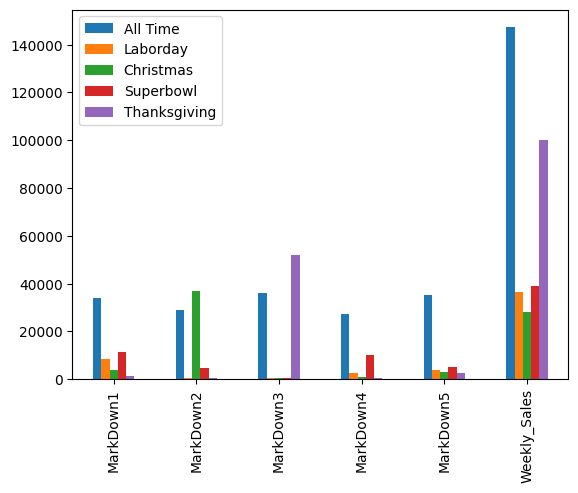

In [ ]:
allmeans.plot(kind="bar")

We noticed that thanksgiving had the highest mean of weekly sales, however, from the powerbi plots, we had noticed that christmas had the highest mean of sales. It is too early in the project to compare the holidays but we intend to research this more thoroughly. 

### 7. Clean the data

In [ ]:
df_final[(df_final['Date'] < '2010-01-01') | (df_final['Date'] > '2013-12-31')] #nothing is out of range we are great

Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Description,,, HolidayNames, Type, Size, Year, Month, Day, Super_Bowl, Labor_Day, Thanksgiving, Christmas]
Index: []

[0 rows x 25 columns]

In [ ]:
df_final[(df_final['Store'] < 1) | (df_final['Store'] > 45)] #nothing is out of range we are great

Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Description,,, HolidayNames, Type, Size, Year, Month, Day, Super_Bowl, Labor_Day, Thanksgiving, Christmas]
Index: []

[0 rows x 25 columns]

In [ ]:
df_final[(df_final['Dept'] < 1) | (df_final['Dept'] > 99)]#nothing is out of range we are great

Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Description,,, HolidayNames, Type, Size, Year, Month, Day, Super_Bowl, Labor_Day, Thanksgiving, Christmas]
Index: []

[0 rows x 25 columns]

In [ ]:
df_final[(df_final['Temperature'] < -70) | (df_final['Temperature'] > 120)] #nothing is out of range we are great

Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Description,,, HolidayNames, Type, Size, Year, Month, Day, Super_Bowl, Labor_Day, Thanksgiving, Christmas]
Index: []

[0 rows x 25 columns]

In [ ]:
# for the holiday names, in all the dates when it is not a celebration, we switched NaN to Not a holiday
df_final['HolidayNames'].fillna('Not a holiday', inplace=True)
df_final

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     1 2010-02-12      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-03-05      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-10-05        628.10      False        64.89   
421567     45    98 2012-10-12       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...   HolidayNames  Type  \
0            2.572        NaN        NaN        NaN  ...  Not a holiday     A   
1            2.548        NaN        NaN        NaN  ...      Superbowl     A   
2            2.514        NaN        NaN        NaN  ...  Not a holiday     A   
3            2.561        NaN        NaN        NaN  ...  Not a holiday     A   
4            2.625        NaN        NaN        NaN  ...  Not a holiday     A   
...            ...        ...        ...        ...  ...            ...   ...   
421565       3.997    4556.61      20.64       1.50  ...  Not a holiday     B   
421566       3.985    5046.74        NaN      18.82  ...  Not a holiday     B   
421567       4.000    1956.28        NaN       7.89  ...  Not a holiday     B   
421568       3.969    2004.02        NaN       3.18  ...  Not a holiday     B   
421569       3.882    4018.91      58.08     100.00  ...  Not a holiday     B   

          Size  Year Month Day Super_Bowl  Labor_Day  Thanksgiving  Christmas  
0       151315  2010     2   5      False      False         False      False  
1       151315  2010     2  12       True      False         False      False  
2       151315  2010     2  19      False      False         False      False  
3       151315  2010     2  26      False      False         False      False  
4       151315  2010     3   5      False      False         False      False  
...        ...   ...   ...  ..        ...        ...           ...        ...  
421565  118221  2012     9  28      False      False         False      False  
421566  118221  2012    10   5      False      False         False      False  
421567  118221  2012    10  12      False      False         False      False  
421568  118221  2012    10  19      False      False         False      False  
421569  118221  2012    10  26      False      False         False      False  

[421570 rows x 25 columns]

In [ ]:
DeepnoteChart(df_final, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}}}""")

In [ ]:
duplicates = df_final.duplicated()
df_final[duplicates]
# no more duplicates we are great

Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Description,,, HolidayNames, Type, Size, Year, Month, Day, Super_Bowl, Labor_Day, Thanksgiving, Christmas]
Index: []

[0 rows x 25 columns]

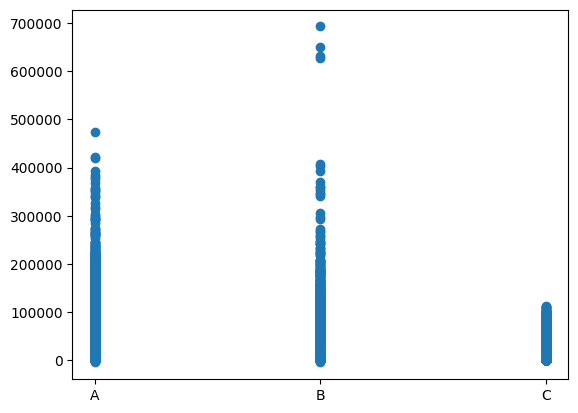

In [ ]:
#check if there are any other types except for A, B and C - there are none, all good
plt.scatter(df_final['Type'], df_final['Weekly_Sales'])
plt.show()

### 8. Throw away, replace, filter corrupt / error prone / missing values

In [ ]:
#we are checking if holidaydates have any dates that are out of assigned range of 2010-2013
holidaydates[(holidaydates['Date'] < '2010-01-01') | (holidaydates['Date'] > '2013-12-31')]

Date HolidayNames
3 2103-02-08    Superbowl

In [ ]:
#we noticed there is one out of range holiday date. From the dates given in the assignment,
                                                                #the Superbowl date was fixed.
holidaydates.loc[holidaydates['Date'] > '2013-12-31', 'Date'] = '2013-02-08'
holidaydates

Date  HolidayNames
0   2010-02-12 00:00:00     Superbowl
1   2011-02-11 00:00:00     Superbowl
2   2011-02-10 00:00:00     Superbowl
3            2013-02-08     Superbowl
4   2010-09-10 00:00:00     Labor Day
5   2011-09-09 00:00:00     Labor Day
6   2012-09-07 00:00:00     Labor Day
7   2013-09-06 00:00:00     Labor Day
8   2010-11-26 00:00:00  Thanksgiving
9   2011-11-25 00:00:00  Thanksgiving
10  2012-11-23 00:00:00  Thanksgiving
11  2013-11-29 00:00:00  Thanksgiving
12  2010-12-31 00:00:00     Christmas
13  2011-12-30 00:00:00     Christmas
14  2012-11-28 00:00:00     Christmas
15  2013-12-27 00:00:00     Christmas

In [ ]:
holidaydates['Date'] = pd.to_datetime(holidaydates['Date'])

#while executing the sanity check of holidaydates data frame, we noticed, that Superbowl dates are incorrect.
#By separating the date columns into year, month, and day, we 
holidaydates['Year'] = holidaydates['Date'].dt.year
holidaydates['Month'] = holidaydates['Date'].dt.month
holidaydates['Day'] = holidaydates['Date'].dt.day

holidaydates

Date  HolidayNames  Year  Month  Day
0  2010-02-12     Superbowl  2010      2   12
1  2011-02-11     Superbowl  2011      2   11
2  2011-02-10     Superbowl  2011      2   10
3  2013-02-08     Superbowl  2013      2    8
4  2010-09-10     Labor Day  2010      9   10
5  2011-09-09     Labor Day  2011      9    9
6  2012-09-07     Labor Day  2012      9    7
7  2013-09-06     Labor Day  2013      9    6
8  2010-11-26  Thanksgiving  2010     11   26
9  2011-11-25  Thanksgiving  2011     11   25
10 2012-11-23  Thanksgiving  2012     11   23
11 2013-11-29  Thanksgiving  2013     11   29
12 2010-12-31     Christmas  2010     12   31
13 2011-12-30     Christmas  2011     12   30
14 2012-11-28     Christmas  2012     11   28
15 2013-12-27     Christmas  2013     12   27

In [ ]:
#we made a new dataframe for superbowl dates to fix incorrect ones
df_superbowl = holidaydates.loc[holidaydates["HolidayNames"] =='Superbowl']
df_superbowl

Date HolidayNames  Year  Month  Day
0 2010-02-12    Superbowl  2010      2   12
1 2011-02-11    Superbowl  2011      2   11
2 2011-02-10    Superbowl  2011      2   10
3 2013-02-08    Superbowl  2013      2    8

In [ ]:
#we searched for duplicated years to find incorrect date and put it in a separate dataframe duplicated_row
superbowl_duplicates = df_superbowl['Year'].duplicated()
duplicated_row = df_superbowl[superbowl_duplicates]
duplicated_row

Date HolidayNames  Year  Month  Day
2 2011-02-10    Superbowl  2011      2   10

In [ ]:
#we selected the date cell of the first and only row of duplicated_row dataframe to retrieve 
                                                                    #the date we want to change
date_to_change = duplicated_row.iloc[0]['Date']
date_to_change

Timestamp('2011-02-10 00:00:00')

In [ ]:
#for the found incorrect date we searched for the index of the row with the same date in holidaynames
index_to_change = holidaydates[holidaydates['Date'] == date_to_change].index[0]
index_to_change

2

In [ ]:
#we changed the date to the correct one and dropped the year, month, day columns that are no longer useful
holidaydates.at[index_to_change, 'Date'] = '2012-02-10'
holidaydates.drop(columns=["Year", "Month", "Day"],inplace=True)
holidaydates

Date  HolidayNames
0  2010-02-12     Superbowl
1  2011-02-11     Superbowl
2  2012-02-10     Superbowl
3  2013-02-08     Superbowl
4  2010-09-10     Labor Day
5  2011-09-09     Labor Day
6  2012-09-07     Labor Day
7  2013-09-06     Labor Day
8  2010-11-26  Thanksgiving
9  2011-11-25  Thanksgiving
10 2012-11-23  Thanksgiving
11 2013-11-29  Thanksgiving
12 2010-12-31     Christmas
13 2011-12-30     Christmas
14 2012-11-28     Christmas
15 2013-12-27     Christmas

In [ ]:
#check for the missing values 
df_final.isna().sum()
#missing values in description hmm

Store                 0
Dept                  0
Date                  0
Weekly_Sales          0
IsHoliday             0
Temperature           0
Fuel_Price            0
MarkDown1        270889
MarkDown2        310322
MarkDown3        284479
MarkDown4        286603
MarkDown5        270138
CPI                   0
Unemployment          0
Description,,         0
HolidayNames          0
Type                  0
Size                  0
Year                  0
Month                 0
Day                   0
Super_Bowl            0
Labor_Day             0
Thanksgiving          0
Christmas             0
dtype: int64

In [ ]:
#we retrieved all the rows with missing values and threw them in the missing dataframe
missing = df_final[df_final["Description"].isna()]

KeyError: 'Description'

In [ ]:
missing #-> we don't know the name of the 39th department

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
15505       2    39 2010-02-19          0.78      False        39.69   
15506       2    39 2010-02-26          7.02      False        46.10   
15507       2    39 2010-03-05          0.78      False        47.17   
15508       2    39 2010-03-19          0.78      False        54.52   
34790       4    39 2010-12-10          1.56      False        42.40   
172459     18    39 2010-05-14         28.00      False        49.90   
182315     19    39 2012-08-31          4.47      False        71.85   
182316     19    39 2012-09-07         13.41       True        72.20   
182317     19    39 2012-09-14         20.86      False        65.08   
182318     19    39 2012-09-21         20.86      False        60.62   
182319     19    39 2012-09-28         11.92      False        56.81   
182320     19    39 2012-10-05         13.41      False        59.86   
182321     19    39 2012-10-12         14.90      False        48.29   
182322     19    39 2012-10-19          8.94      False        53.44   
182323     19    39 2012-10-26         28.31      False        56.49   
262040     27    39 2011-12-23          1.98      False        41.59   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...   HolidayNames  Type  \
15505        2.514        NaN        NaN        NaN  ...  Not a holiday     A   
15506        2.561        NaN        NaN        NaN  ...  Not a holiday     A   
15507        2.625        NaN        NaN        NaN  ...  Not a holiday     A   
15508        2.720        NaN        NaN        NaN  ...  Not a holiday     A   
34790        2.860        NaN        NaN        NaN  ...  Not a holiday     A   
172459       2.983        NaN        NaN        NaN  ...  Not a holiday     B   
182315       4.026   19970.78     236.96      23.99  ...  Not a holiday     A   
182316       4.076    9053.47      27.41      22.94  ...      Labor Day     A   
182317       4.088   13667.97        NaN      13.57  ...  Not a holiday     A   
182318       4.203   11030.97     147.55      13.50  ...  Not a holiday     A   
182319       4.158    2992.04      48.46        NaN  ...  Not a holiday     A   
182320       4.151    6971.59        NaN      10.96  ...  Not a holiday     A   
182321       4.186    2374.50        NaN       7.25  ...  Not a holiday     A   
182322       4.153    2948.25        NaN      17.40  ...  Not a holiday     A   
182323       4.071    5430.75      90.07        NaN  ...  Not a holiday     A   
262040       3.587    2415.40     239.89    1438.33  ...  Not a holiday     A   

          Size  Year Month Day Super_Bowl  Labor_Day  Thanksgiving  Christmas  
15505   202307  2010     2  19      False      False         False      False  
15506   202307  2010     2  26      False      False         False      False  
15507   202307  2010     3   5      False      False         False      False  
15508   202307  2010     3  19      False      False         False      False  
34790   205863  2010    12  10      False      False         False      False  
172459  120653  2010     5  14      False      False         False      False  
182315  203819  2012     8  31      False      False         False      False  
182316  203819  2012     9   7      False       True         False      False  
182317  203819  2012     9  14      False      False         False      False  
182318  203819  2012     9  21      False      False         False      False  
182319  203819  2012     9  28      False      False         False      False  
182320  203819  2012    10   5      False      False         False      False  
182321  203819  2012    10  12      False      False         False      False  
182322  203819  2012    10  19      False      False         False      False  
182323  203819  2012    10  26      False      False         False      False  
262040  204184  2011    12  23      False      False         False      False  

[16 rows x 25 columns]

In [ ]:
#after analysing the amount of data with missing decription (only 16 rows so it doesn't affect the dataset that much) 
#we had decided to drop the missing values 
df_final.dropna(subset=["Description"], inplace=True)

In [ ]:
df_final.isna().sum() #success!!!

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270883
MarkDown2       310312
MarkDown3       284471
MarkDown4       286597
MarkDown5       270132
CPI                  0
Unemployment         0
Description          0
HolidayNames         0
Type                 0
Size                 0
Year                 0
Month                0
Day                  0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=755e957e-1a32-4030-9372-201dbf660aae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>